In [72]:
import pandas as pd

In [73]:
data = pd.read_csv('data/wine_cleared.csv')

In [74]:
data['price_round'] = data['price'].round().astype(int)

In [75]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Настенька\AppData\Local\Temp\ipykernel_12172\1904379352.py:1: SyntaxWarning: invalid escape sequence '\d'
  regex = '\d{4}' # регулярное выражение для нахождения чисел


In [76]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

In [77]:
data['country'].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [78]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)

In [79]:
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [80]:
data['is_france'].sum()

22093

In [81]:
data['is_italy'].sum()

19540

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  price_round            129971 non-null  int32  
 14  year                   125362 non-nu

In [83]:
data['year'] = pd.to_datetime(data['year'], errors='coerce')

In [84]:
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 

In [85]:
data['old_wine'].sum()

39765

In [86]:
regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)

<>:1: SyntaxWarning: invalid escape sequence '\('
<>:1: SyntaxWarning: invalid escape sequence '\('
C:\Users\Настенька\AppData\Local\Temp\ipykernel_12172\3250387826.py:1: SyntaxWarning: invalid escape sequence '\('
  regex = '\((.*?)\)'


In [87]:
data['locality']

0                           Etna
1                          Douro
2              Willamette Valley
3            Lake Michigan Shore
4              Willamette Valley
                   ...          
129966    Erben Müller-Burggraef
129967                    Oregon
129968                    Alsace
129969                    Alsace
129970                    Alsace
Name: locality, Length: 129971, dtype: object

In [88]:
country_population = pd.read_csv('data/country_population.csv', sep=';')

country_population.head(50)

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
5,Brazil,"214,191,924"
6,Nigeria,"211,401,000"
7,Bangladesh,"172,011,942"
8,Russia,"146,171,015"
9,Mexico,"126,014,024"


In [89]:
country_population.loc[country_population['country'] == 'Italy']

,country,population
24,Italy,"59,097,904"


In [90]:
data.join(country_population.set_index('country'), on='country')

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013-01-01,0,0,1,0,Etna,"59,097,904"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,15,2011-01-01,0,0,0,0,Douro,"10,347,892"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Gris,Rainstorm,14,2013-01-01,1,0,0,0,Willamette Valley,"333,022,386"
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,Riesling,St. Julian,13,2013-01-01,1,0,0,0,Lake Michigan Shore,"333,022,386"
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Noir,Sweet Cheeks,65,2012-01-01,1,0,0,0,Willamette Valley,"333,022,386"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013-01-01,0,0,0,0,Erben Müller-Burggraef,"83,129,285"
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Pinot Noir,Citation,75,2004-01-01,1,0,0,1,Oregon,"333,022,386"
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Gewürztraminer,Domaine Gresser,30,2013-01-01,0,1,0,0,Alsace,"68,035,000"
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Pinot Gris,Domaine Marcel Deiss,32,2012-01-01,0,1,0,0,Alsace,"68,035,000"


In [91]:
country_area = pd.read_csv('data/country_area.csv', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


In [92]:
data = data.join(country_area.set_index('country'), on='country')

In [93]:
data.loc[data['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,area
94,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Sean P. Sullivan,@wawinereport,...,Viognier,Gård,22,2014-01-01,1,0,0,0,Columbia Valley (WA,9372610.0


In [94]:
# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


In [95]:
calls['duration'] = (calls['end_date'] - calls['created_at']).dt.seconds
calls

,client_id,agent_date,created_at,end_date,duration
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45,1
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13,231
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04,104
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29,2
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03,215
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00,95
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59,92
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58,215
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55,94
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32,6


In [96]:
calls['time_connection'] = (calls['created_at'] - calls['agent_date']).dt.seconds
print(calls)
calls['time_connection'].sum()

   client_id          agent_date          created_at            end_date  \
0        460 2013-12-17 04:55:39 2013-12-17 04:55:44 2013-12-17 04:55:45   
1         12 2013-12-16 20:03:20 2013-12-16 20:03:22 2013-12-16 20:07:13   
2         56 2013-12-16 20:03:20 2013-12-16 20:03:20 2013-12-16 20:05:04   
3        980 2013-12-16 20:03:20 2013-12-16 20:03:27 2013-12-16 20:03:29   
4        396 2013-12-16 20:08:27 2013-12-16 20:08:28 2013-12-16 20:12:03   
5        449 2013-12-16 20:03:20 2013-12-16 20:03:25 2013-12-16 20:05:00   
6        397 2013-12-16 20:08:25 2013-12-16 20:08:27 2013-12-16 20:09:59   
7        398 2013-12-16 20:01:23 2013-12-16 20:01:23 2013-12-16 20:04:58   
8        452 2013-12-16 20:03:20 2013-12-16 20:03:21 2013-12-16 20:04:55   
9        440 2013-12-16 20:03:20 2013-12-16 20:04:26 2013-12-16 20:04:32   

   duration  time_connection  
0         1                5  
1       231                2  
2       104                0  
3         2                7  
4       

89

In [97]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x>10 else 0)
calls['is_connection'].sum()

7

In [98]:
calls['time_diff'] = (calls['end_date'] - calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

In [99]:
calls = calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

In [100]:
data['years_diff'] = (pd.to_datetime("2022-01-12") - data['year']).dt.days
data['years_diff'].max()

98627.0

In [101]:
import category_encoders as ce

In [102]:
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [103]:
# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])
# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing[['size']])
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [104]:
data['year'].value_counts()

year
2013-01-01    15853
2012-01-01    15723
2014-01-01    15568
2011-01-01    12531
2010-01-01    12149
              ...  
1973-01-01        1
1935-01-01        1
1967-01-01        1
1969-01-01        1
1945-01-01        1
Name: count, Length: 81, dtype: int64

In [105]:
ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(data['year'])  
data = pd.concat([data, data_bin], axis=1)
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,price_round,year,is_usa,is_france,is_italy,old_wine,locality,area,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,35,2013-01-01,0,0,1,0,Etna,301230.0,3298.0,2013-01-01
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,15,2011-01-01,0,0,0,0,Douro,92391.0,4029.0,2011-01-01
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,14,2013-01-01,1,0,0,0,Willamette Valley,9372610.0,3298.0,2013-01-01
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,13,2013-01-01,1,0,0,0,Lake Michigan Shore,9372610.0,3298.0,2013-01-01
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,65,2012-01-01,1,0,0,0,Willamette Valley,9372610.0,3664.0,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,28,2013-01-01,0,0,0,0,Erben Müller-Burggraef,357022.0,3298.0,2013-01-01
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,75,2004-01-01,1,0,0,1,Oregon,9372610.0,6586.0,2004-01-01
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,30,2013-01-01,0,1,0,0,Alsace,547030.0,3298.0,2013-01-01
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,32,2012-01-01,0,1,0,0,Alsace,547030.0,3664.0,2012-01-01


In [106]:
encoder = ce.OneHotEncoder(cols=['type'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129971 non-null  int64         
 1   country                129908 non-null  object        
 2   description            129971 non-null  object        
 3   designation            129971 non-null  object        
 4   points                 129971 non-null  int64         
 5   price                  129971 non-null  float64       
 6   province               129908 non-null  object        
 7   region_1               129971 non-null  object        
 8   taster_name            129971 non-null  object        
 9   taster_twitter_handle  129971 non-null  object        
 10  title                  129971 non-null  object        
 11  variety                129970 non-null  object        
 12  winery                 129971 non-null  obje

In [108]:
encoder = ce.OneHotEncoder(cols=['taster_name'])
type_bin = encoder.fit_transform(data['taster_name'])
data = pd.concat([data, type_bin], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129971 non-null  int64         
 1   country                129908 non-null  object        
 2   description            129971 non-null  object        
 3   designation            129971 non-null  object        
 4   points                 129971 non-null  int64         
 5   price                  129971 non-null  float64       
 6   province               129908 non-null  object        
 7   region_1               129971 non-null  object        
 8   taster_name            129971 non-null  object        
 9   taster_twitter_handle  129971 non-null  object        
 10  title                  129971 non-null  object        
 11  variety                129970 non-null  object        
 12  winery                 129971 non-null  obje

In [109]:
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


In [110]:
#data_new = pd.read_csv('data/wine_cleared.csv')

In [111]:
#data_new.info()

In [112]:
bin_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['country'])
data = pd.concat([data, type_bin], axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129971 non-null  int64         
 1   country                129908 non-null  object        
 2   description            129971 non-null  object        
 3   designation            129971 non-null  object        
 4   points                 129971 non-null  int64         
 5   price                  129971 non-null  float64       
 6   province               129908 non-null  object        
 7   region_1               129971 non-null  object        
 8   taster_name            129971 non-null  object        
 9   taster_twitter_handle  129971 non-null  object        
 10  title                  129971 non-null  object        
 11  variety                129970 non-null  object        
 12  winery                 129971 non-null  obje

In [113]:
#data = pd.read_csv('data/wine_cleared.csv')
#data.info()

In [114]:
encoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
type_bin = encoder.fit_transform(data['taster_twitter_handle'])
data = pd.concat([data, type_bin], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               129971 non-null  int64         
 1   country                  129908 non-null  object        
 2   description              129971 non-null  object        
 3   designation              129971 non-null  object        
 4   points                   129971 non-null  int64         
 5   price                    129971 non-null  float64       
 6   province                 129908 non-null  object        
 7   region_1                 129971 non-null  object        
 8   taster_name              129971 non-null  object        
 9   taster_twitter_handle    129971 non-null  object        
 10  title                    129971 non-null  object        
 11  variety                  129970 non-null  object        
 12  winery          

In [115]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)
df

,product,price,payment_type
0,Product1,1200,Mastercard
1,Product2,3600,Visa
2,Product3,7500,Amex


In [116]:
encoder = ce.OneHotEncoder(cols=['product'])
type_bin = encoder.fit_transform(df['product'])
df = pd.concat([df, type_bin], axis=1)


In [117]:
encoder = ce.OneHotEncoder(cols=['payment_type'])
type_bin = encoder.fit_transform(df['payment_type'])
df = pd.concat([df, type_bin], axis=1)
df

,product,price,payment_type,product_1,product_2,product_3,payment_type_1,payment_type_2,payment_type_3
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1


In [118]:
import numpy as np 
np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)
df

,beta,exponential,normal_p,normal_l
0,39.273740,2.263890,11.860245,4.748207
1,55.030395,13.108592,11.796582,10.959172
2,47.434682,3.312019,11.146945,3.919227
3,43.173536,17.664301,8.266689,42.072915
4,45.681443,2.109760,5.112983,16.960664
...,...,...,...,...
995,50.976583,3.748883,7.057497,9.609427
996,46.290172,1.195512,8.419497,14.972852
997,58.912029,7.014868,11.541732,33.654934
998,52.185621,2.391140,11.819914,6.091417


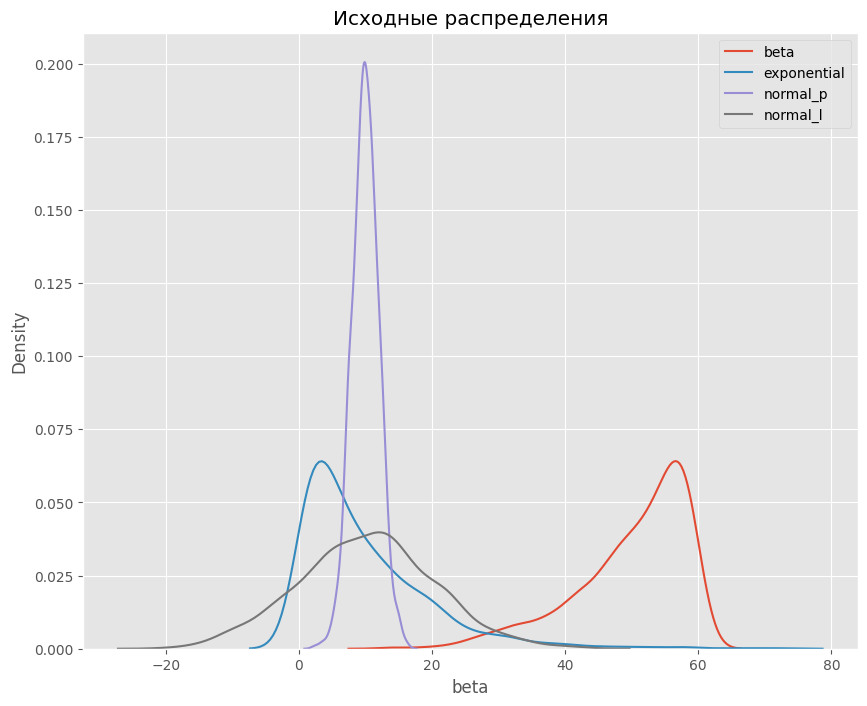

In [119]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [120]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

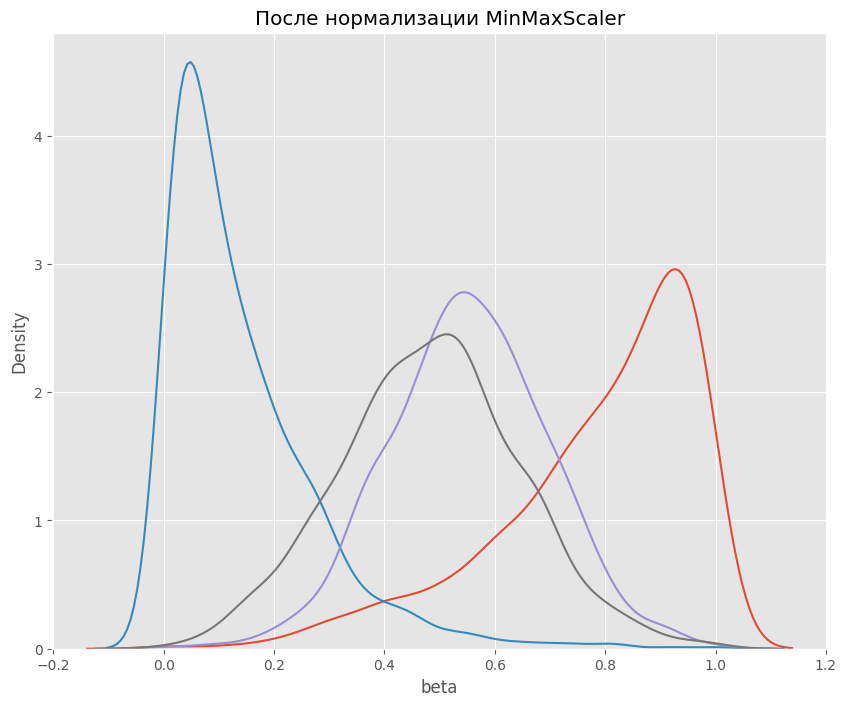

In [121]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

In [122]:
df_mm.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.783981,0.140471,0.551120,0.482297
std,0.183684,0.136450,0.145334,0.163992
min,0.000000,0.000000,0.000000,0.000000
25%,0.692276,0.041266,0.456837,0.375032
50%,0.834120,0.098280,0.550362,0.484741
75%,0.929157,0.196461,0.645864,0.586810
max,1.000000,1.000000,1.000000,1.000000


<Axes: title={'center': 'Распределения после RobustScaler'}, xlabel='beta', ylabel='Density'>

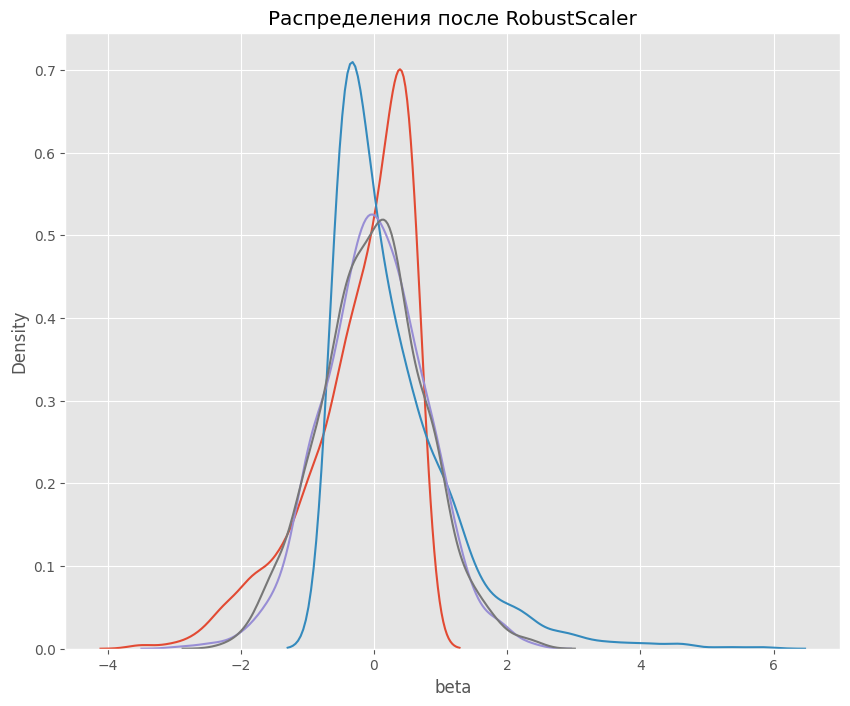

In [123]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)

In [124]:
df_r.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,-2.116639e-01,2.718638e-01,4.011529e-03,-0.011541
std,7.754247e-01,8.792225e-01,7.688570e-01,0.774358
min,-3.521256e+00,-6.332678e-01,-2.911564e+00,-2.288916
25%,-5.987992e-01,-3.673671e-01,-4.947706e-01,-0.518040
50%,3.252607e-16,-4.011548e-17,3.390842e-16,0.000000
75%,4.012008e-01,6.326329e-01,5.052294e-01,0.481960
max,7.002654e-01,5.810261e+00,2.378706e+00,2.433017


<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

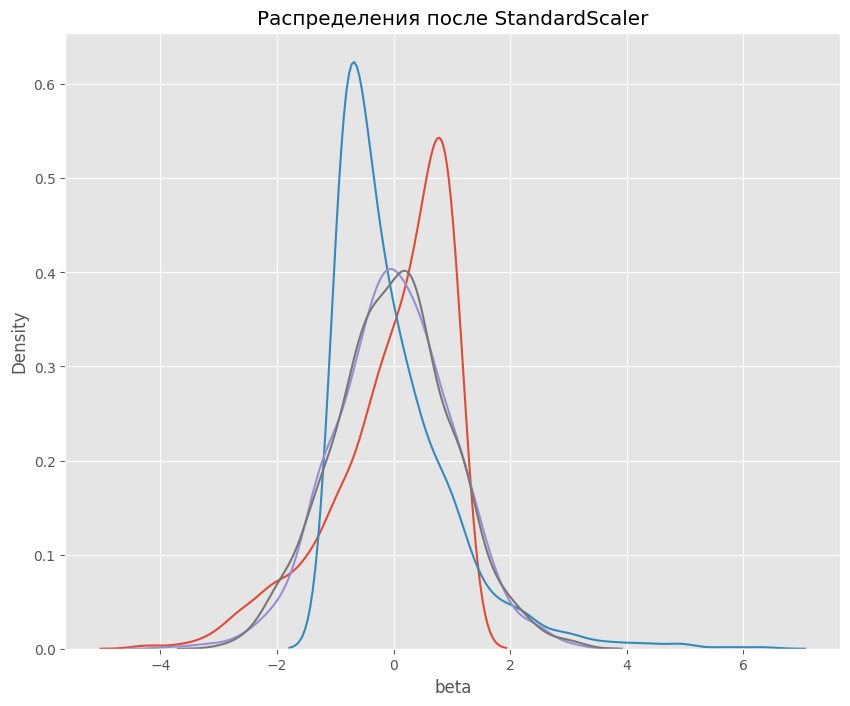

In [125]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

In [126]:
df_s.describe()

,beta,exponential,normal_p,normal_l
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,6.075140e-16,-1.776357e-18,8.100187e-16,-2.398082e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.270238e+00,-1.029983e+00,-3.793988e+00,-2.942457e+00
25%,-4.995057e-01,-7.274049e-01,-6.490566e-01,-6.544169e-01
50%,2.731017e-01,-3.093641e-01,-5.220134e-03,1.491105e-02
75%,7.907555e-01,4.105327e-01,6.522262e-01,6.376219e-01
max,1.176627e+00,6.302351e+00,3.090149e+00,3.158464e+00


In [127]:
#data_s = pd.read_csv('data/wine_cleared.csv')
#data_s.info()

In [128]:
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
data['price'] = r_scaler.fit_transform(data['price'].to_numpy().reshape(-1,1))
round(data['price'].sum())

43501

In [129]:
#data_n = pd.read_csv('data/wine_cleared.csv')
#data_n.info()

In [130]:
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
data['price'] = s_scaler.fit_transform(data['price'].to_numpy().reshape(-1,1))
round(data['price'][129968],2)

-0.14

In [131]:
import pandas as pd

iris = pd.read_csv('data/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<Axes: >

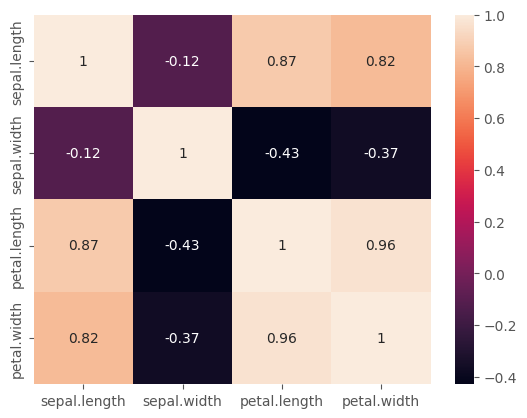

In [132]:
# импортируем seaborn для построения графиков
import seaborn as sns

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(iris.corr(numeric_only=True), annot=True)

In [133]:
iris = iris.drop(['petal.width'], axis=1)

In [134]:
iris = iris.drop(['petal.length'], axis=1)

Это означает, что всего два признака — sepal length (длина наружной доли околоцветника) и sepal width (ширина наружной доли околоцветника) сообщают модели то же самое, что и исходный набор признаков. Мы уменьшили количество признаков, не потеряв при этом информацию о данных. А признаки petal length (длина внутренней доли околоцветника) и petal width (ширина внутренней доли околоцветник) сообщают лишнюю информацию для модели. Значит, они не нужны для построения модели.

<Axes: >

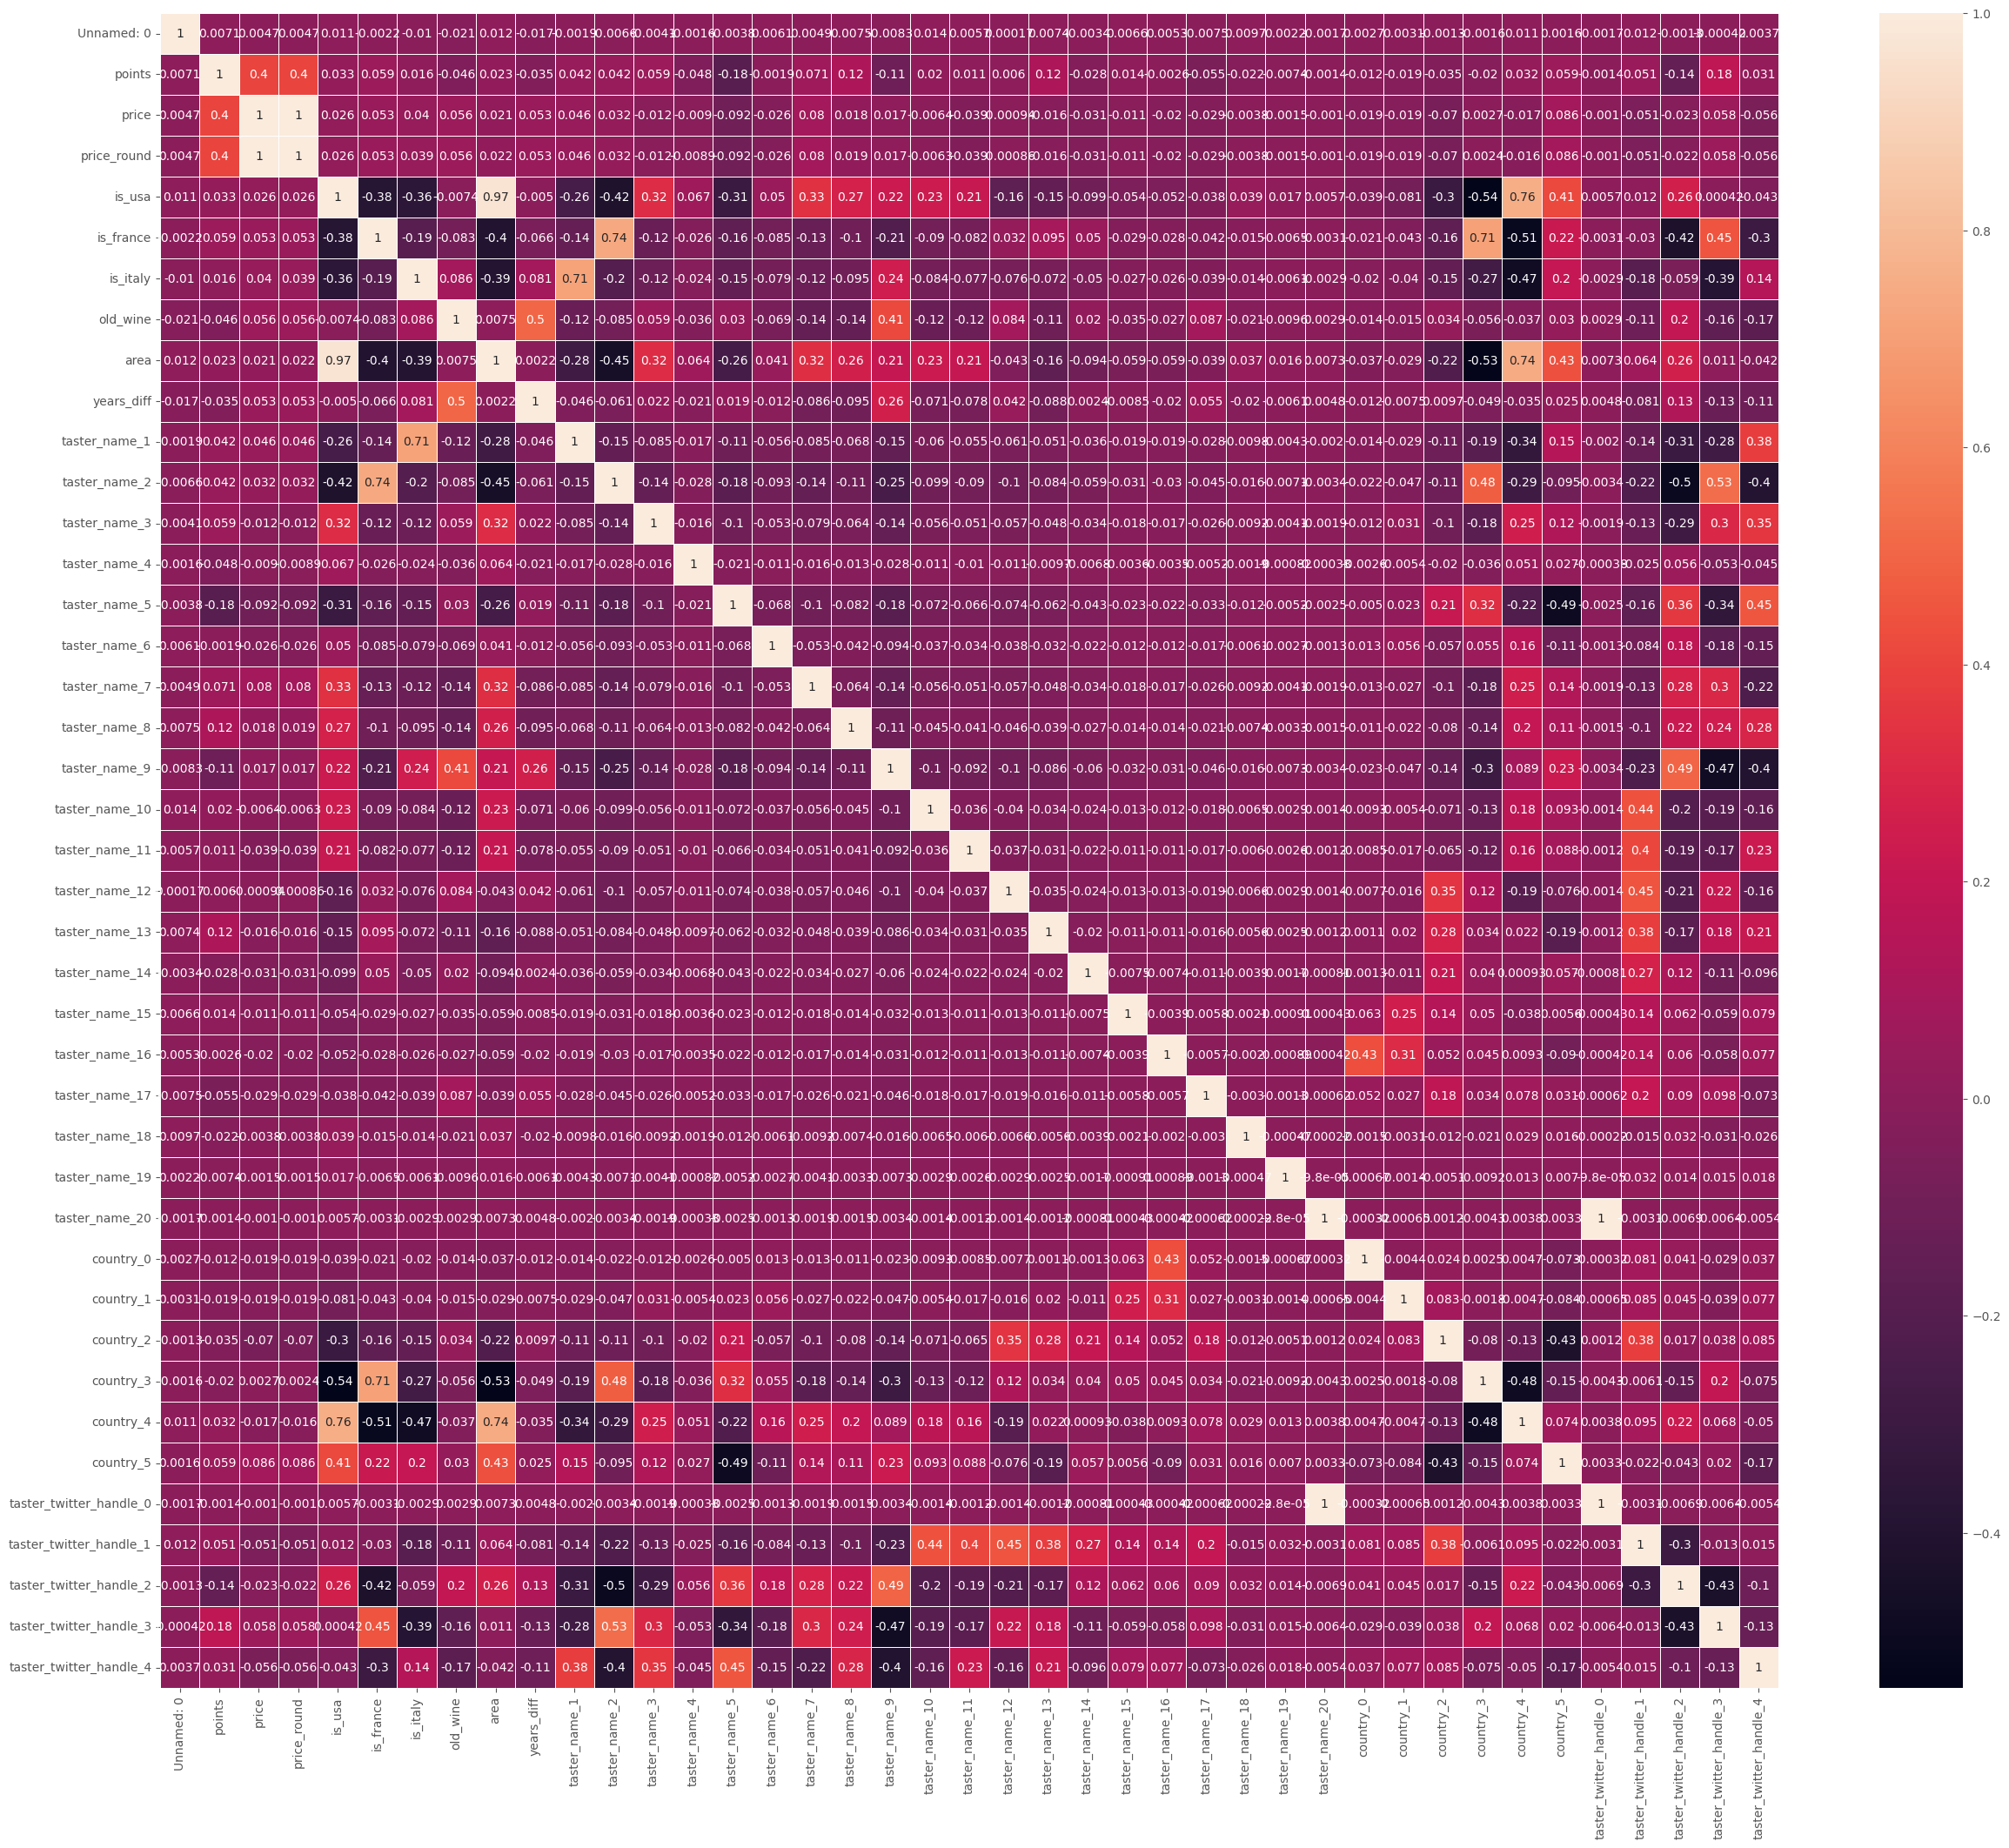

In [141]:
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

In [143]:
# Удалим самые сильно скоррелированные пары
data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

KeyError: "['is_usa' 'is_france' 'is_italy' 'price_round' 'area'] not found in axis"

<Axes: >

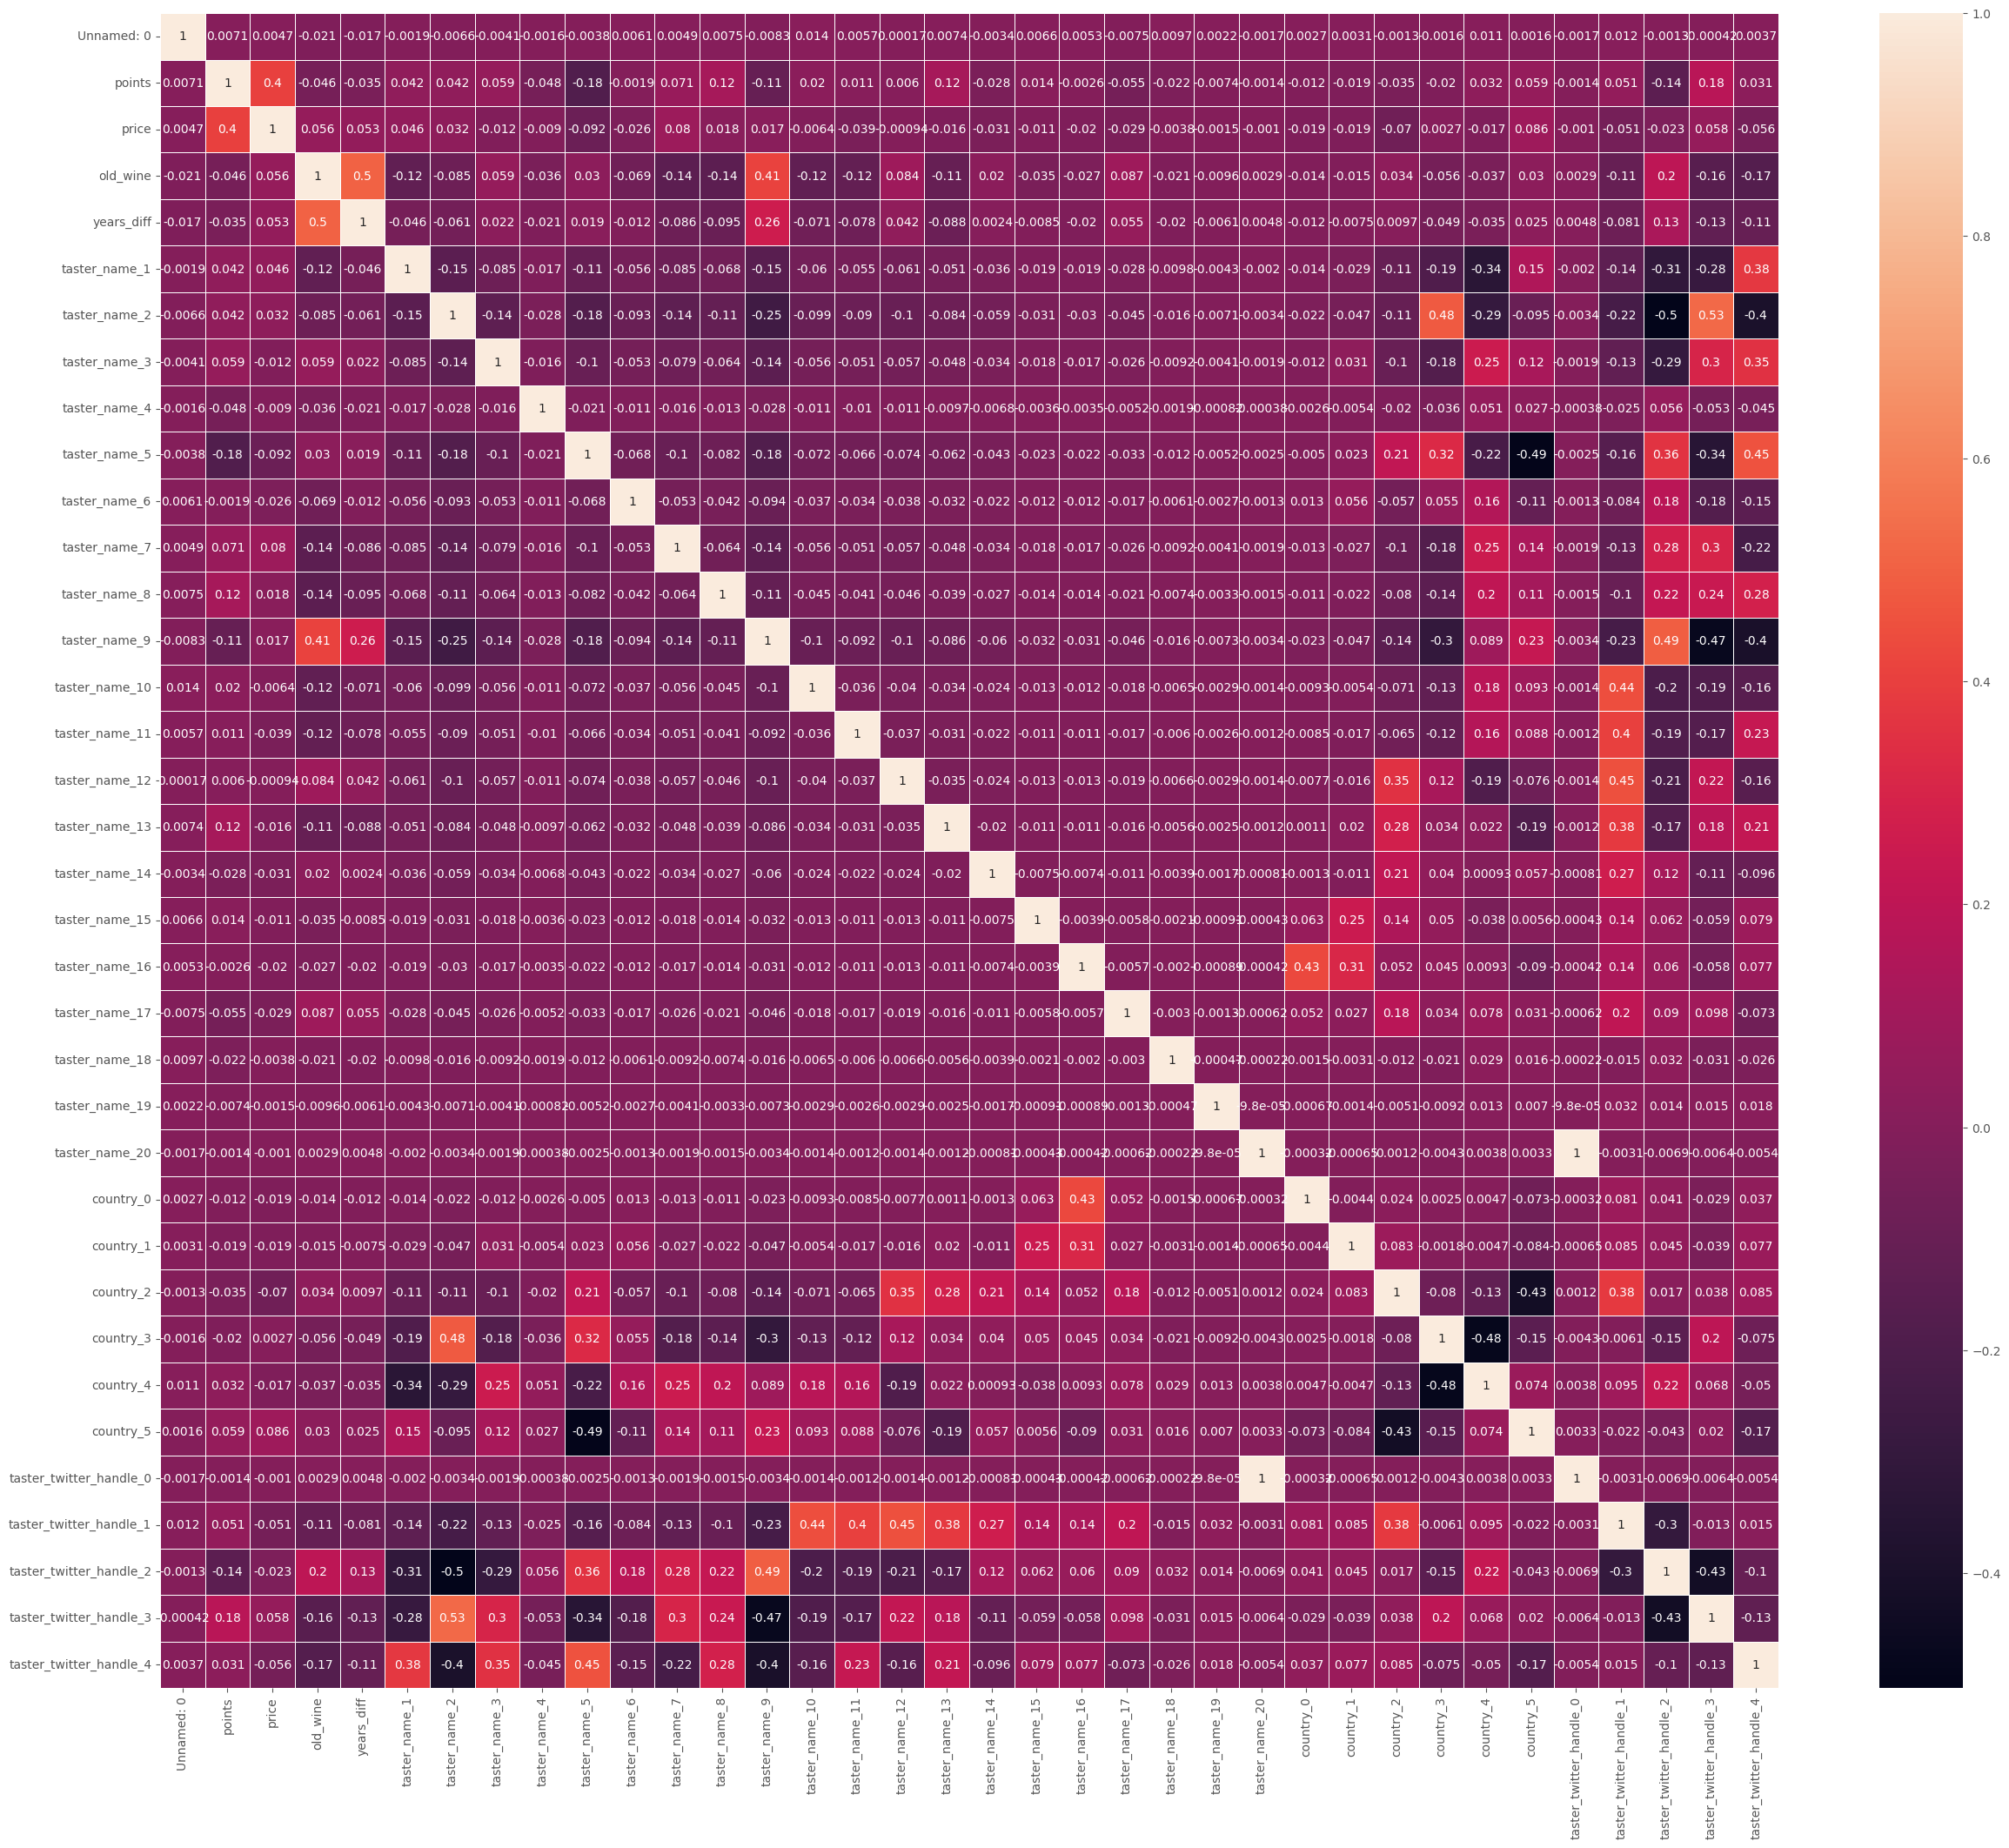

In [145]:
# Проверяем, что сильно скоррелированных признаков не осталось
fig, ax = plt.subplots(figsize=(30,25))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               129971 non-null  int64         
 1   country                  129908 non-null  object        
 2   description              129971 non-null  object        
 3   designation              129971 non-null  object        
 4   points                   129971 non-null  int64         
 5   price                    129971 non-null  float64       
 6   province                 129908 non-null  object        
 7   region_1                 129971 non-null  object        
 8   taster_name              129971 non-null  object        
 9   taster_twitter_handle    129971 non-null  object        
 10  title                    129971 non-null  object        
 11  variety                  129970 non-null  object        
 12  winery          

<Axes: >

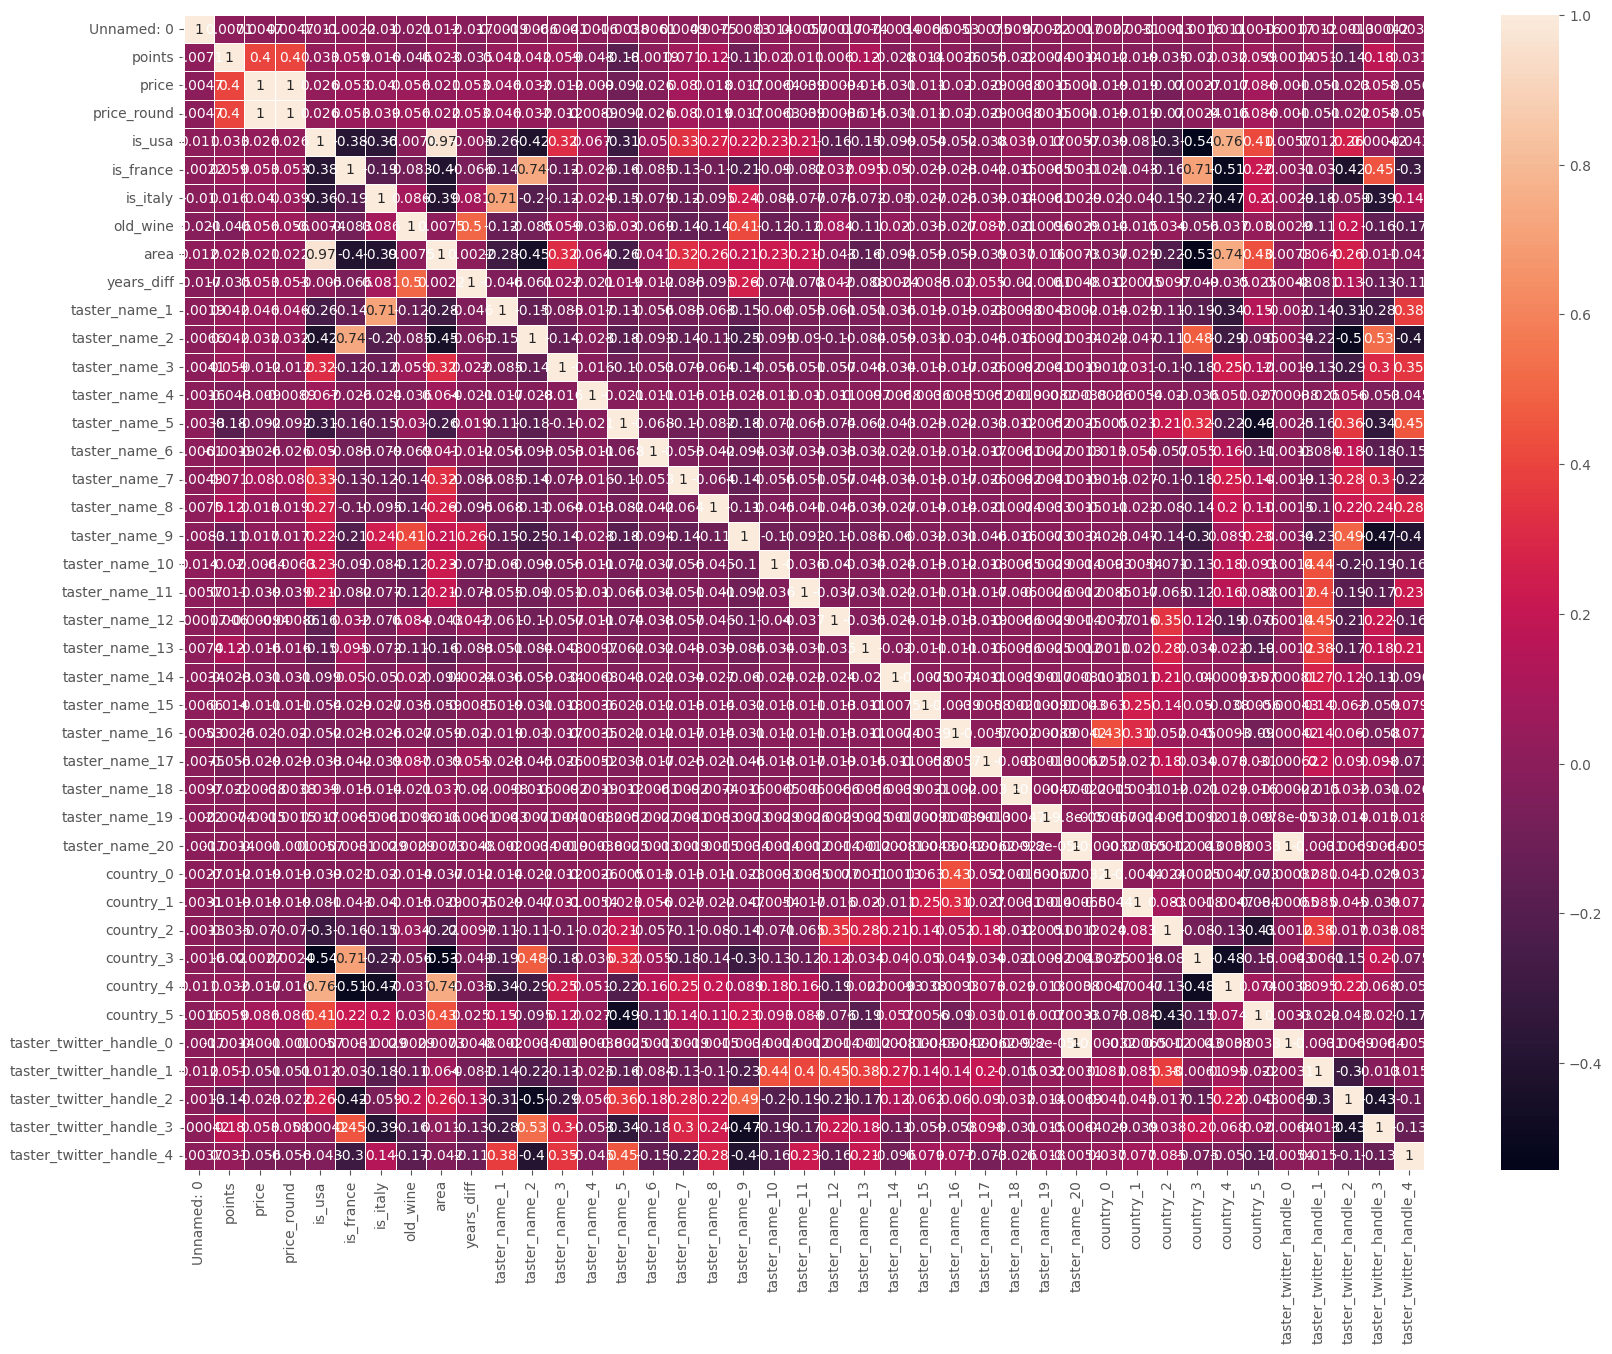

In [140]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)